In [199]:
import pandas as pd
import numpy as np

In [200]:
data = pd.read_csv('AmesHousing.txt', delimiter="\t")

train=data[0:1460]
test=data[1460:]

In [201]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)


Train shape: (1460, 82)
Test shape: (1470, 82)


In [202]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)


In [203]:
# lets describe the series
train['SalePrice'].describe()


count      1460.000000
mean     179607.671918
std       78382.176457
min       12789.000000
25%      128987.500000
50%      160000.000000
75%      213062.500000
max      615000.000000
Name: SalePrice, dtype: float64

Skew is: 1.62294028329


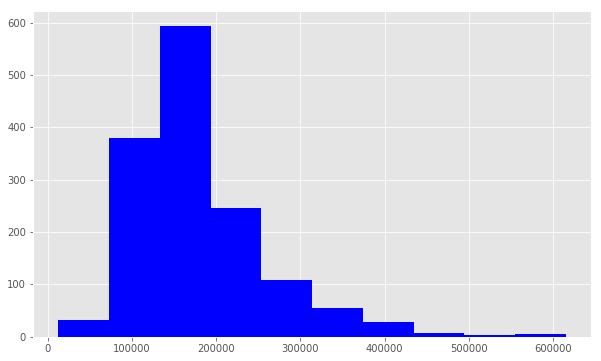

In [204]:
# makes sense to log transform data
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()


New Skew is: -0.0724339928744


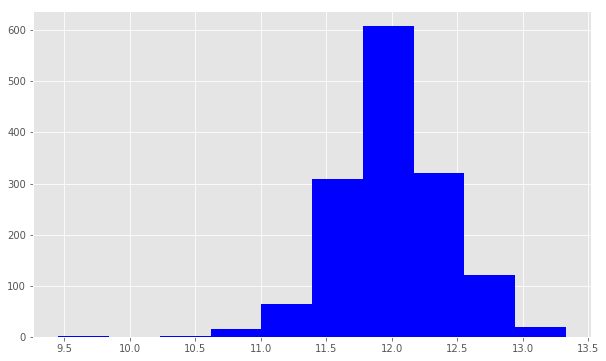

In [205]:
target=np.log(train.SalePrice)
print("New Skew is:",target.skew())
plt.hist(target,color='blue')
plt.show()

In [206]:
numeric_features=train.select_dtypes(include=[np.number])
numeric_features.dtypes



Order                int64
PID                  int64
MS SubClass          int64
Lot Frontage       float64
Lot Area             int64
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
Fireplaces           int64
Garage Yr Blt      float64
Garage Cars        float64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Mo Sold              int64
Y

In [207]:
# now lets check for correlations between target and columns

corr= numeric_features.corr()

print(corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-10:])


SalePrice         1.000000
Overall Qual      0.804562
Gr Liv Area       0.698990
Total Bsmt SF     0.683037
Garage Cars       0.663485
Garage Area       0.662397
1st Flr SF        0.657119
Year Built        0.591436
Garage Yr Blt     0.561873
Year Remod/Add    0.545219
Name: SalePrice, dtype: float64 

Mo Sold           -0.011901
Yr Sold           -0.042695
Bsmt Half Bath    -0.055288
Low Qual Fin SF   -0.060352
Order             -0.068181
MS SubClass       -0.088504
Overall Cond      -0.099395
Kitchen AbvGr     -0.130843
Enclosed Porch    -0.165873
PID               -0.259920
Name: SalePrice, dtype: float64


In [208]:
train['Overall Qual'].unique()


array([ 6,  5,  7,  8,  9,  4,  3,  2, 10,  1])

In [209]:
quality_pivot=train.pivot_table(index="Overall Qual",values="SalePrice",
aggfunc=np.median)

In [210]:
quality_pivot


,SalePrice
Overall Qual,
1,61000.0
2,58312.5
3,82187.5
4,105625.0
5,133000.0
6,159500.0
7,201000.0
8,256650.0
9,343430.0


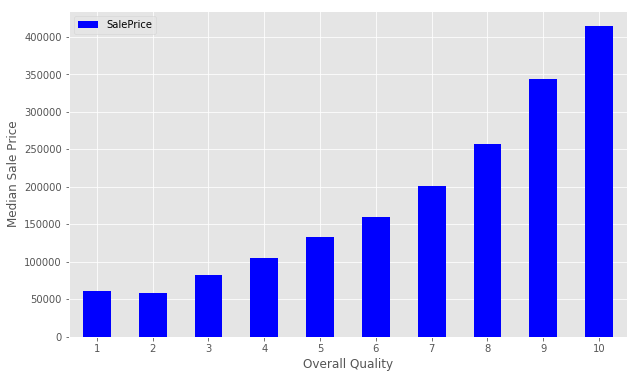

In [211]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

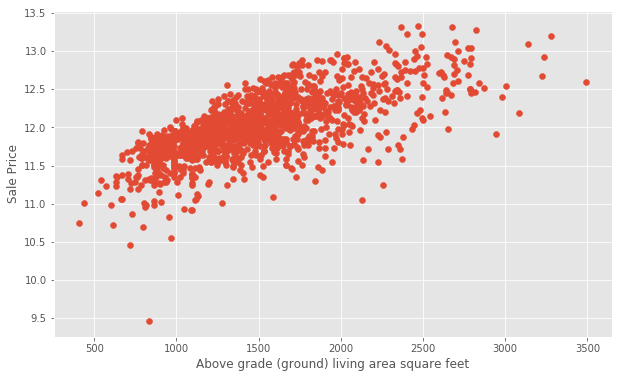

In [212]:
plt.scatter(x=train["Gr Liv Area"], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

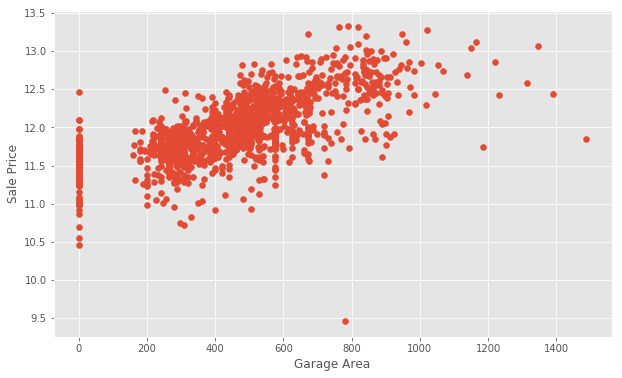

In [213]:
plt.scatter(x=train['Garage Area'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [214]:
train = train[train['Garage Area']<1200]

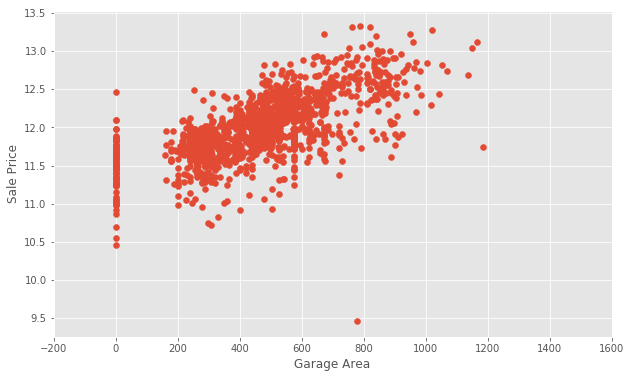

In [215]:
plt.scatter(x=train['Garage Area'],y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [216]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
Pool QC,1453
Misc Feature,1394
Alley,1346
Fence,1159
Fireplace Qu,716
Lot Frontage,248
Garage Finish,75
Garage Qual,75
Garage Cond,75


In [217]:
print ("Unique values are:", train['Misc Feature'].unique())

Unique values are: [nan 'Gar2' 'Shed' 'Othr']


In [218]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,1454,1454,108,1454,1454,1454,1454,1454,1454,1454,...,1380,1379,1379,1379,1454,1,295,60,1454,1454
unique,6,2,2,4,4,3,5,3,26,9,...,6,3,5,5,3,1,4,3,9,5
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1117,1449,64,935,1329,1451,1056,1391,239,1235,...,848,619,1308,1333,1322,1,167,56,1305,1264


In [219]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

/Users/dmitrybelaev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [220]:
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    1449
0       5
Name: enc_street, dtype: int64


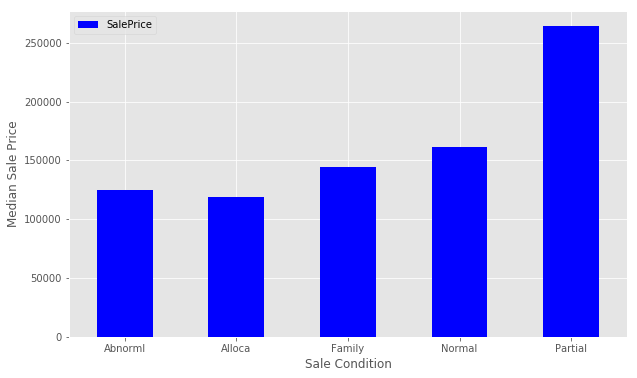

In [221]:
# piviot tables, group by index, apply mean calc on values=dfare( value is whatever needs to be calculated)
#passenger_class_fares = titanic_survival.pivot_table(index="pclass", values="fare", aggfunc=numpy.mean)


conditional_pivot=train.pivot_table(index='Sale Condition', values='SalePrice',aggfunc=np.median)
conditional_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [222]:
# partial offers significantly higher price

def encode(x): return 1 if x=='Partial' else 0
train['enc_condition'] = train['Sale Condition'].apply(encode)
test['enc_condition'] = test['Sale Condition'].apply(encode)

/Users/dmitrybelaev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


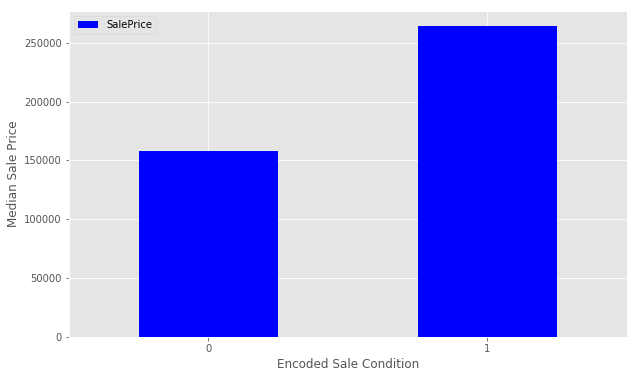

In [223]:
conditional_pivot=train.pivot_table(index='enc_condition', values='SalePrice',aggfunc=np.median)
conditional_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [224]:
# drop below columns as they contain more than 50% of missing values

#drop_cols=['Pool QC','Misc Feature','Alley','Fence']

train = train.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)


In [225]:
# check that it worked
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
Fireplace Qu,716
Lot Frontage,248
Garage Yr Blt,75
Garage Finish,75
Garage Qual,75
Garage Cond,75
Garage Type,74
Bsmt Exposure,41
BsmtFin Type 2,41


In [226]:
test.shape

(1470, 84)

In [227]:
test = test.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [228]:
test.shape

(1470, 80)

In [229]:
data=train.select_dtypes(include=[np.number]).interpolate().dropna()

In [230]:
# check if all cols now have any null values
sum(data.isnull().sum() !=0)


0

In [231]:
# Lets build a model

In [232]:
y = np.log(train.SalePrice)
X=data.drop(['SalePrice'],axis=1)


In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)


In [234]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [235]:
model=lr.fit(X_train,y_train)


In [236]:
print('R_sqr is:',model.score(X_test,y_test))
      

R_sqr is: 0.904607484877


In [237]:
predictions=model.predict(X_test)
predictions_train=model.predict(X_train)



In [243]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))


MSE is: 0.0144626478603


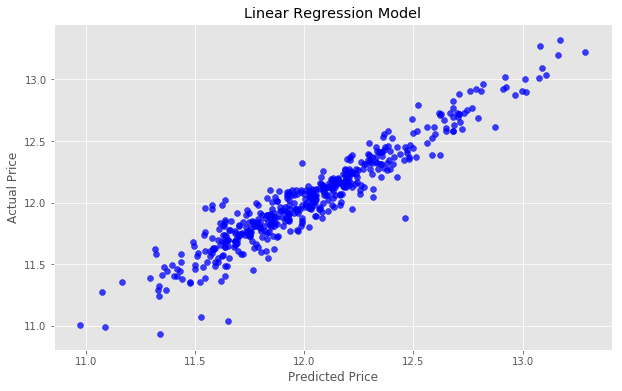

In [239]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

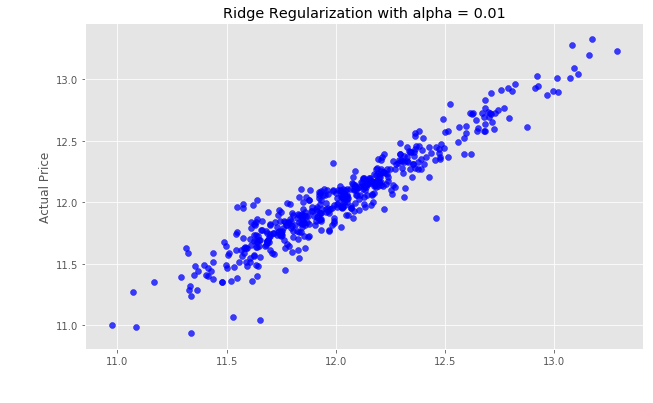

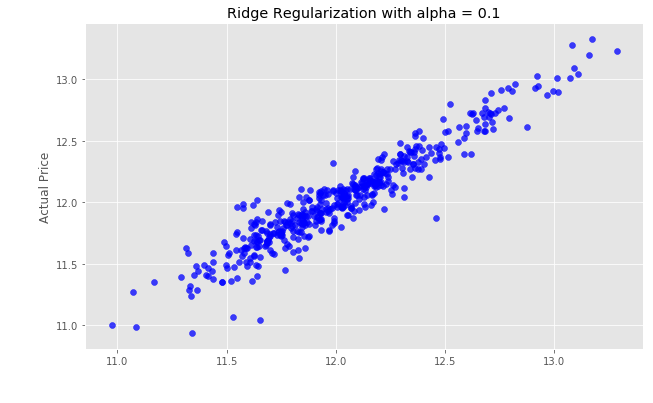

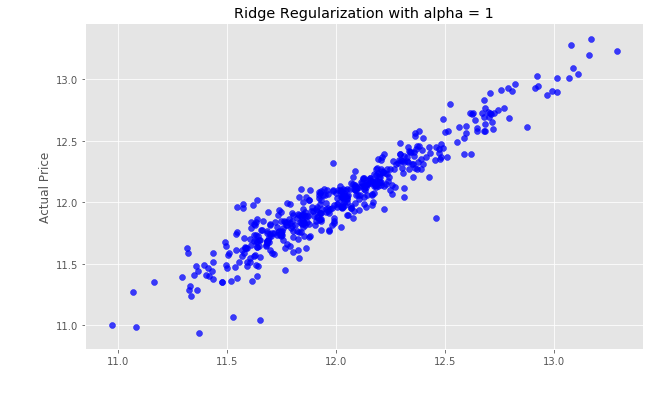

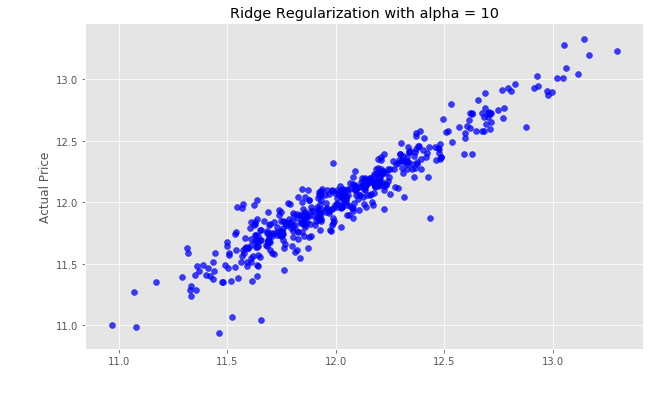

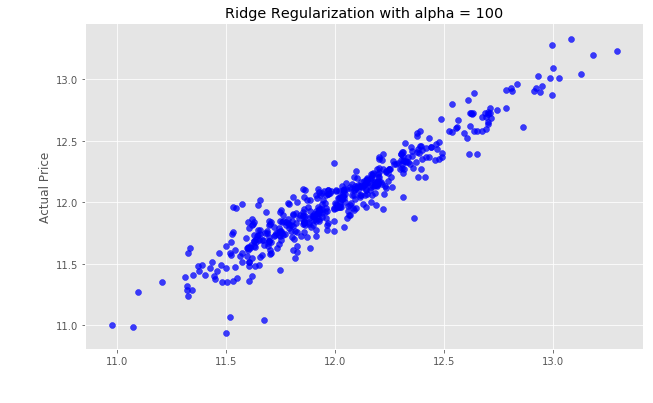

In [240]:
# Much better result than using features with corr>0.5
# Lets further improve them model through L2 regularization

for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    #plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()
    

In [241]:
print('Ridge R sqr is:',ridge_model.score(X_test, y_test))
print('Ridge MSE is',mean_squared_error(y_test, preds_ridge))



Ridge R sqr is: 0.904654875994
Ridge MSE is 0.0144554627993


In [242]:
# very insignificant improvement